In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Preprocessing Data

Calculate the median values and fill up the missing values with median.

In [3]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [4]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

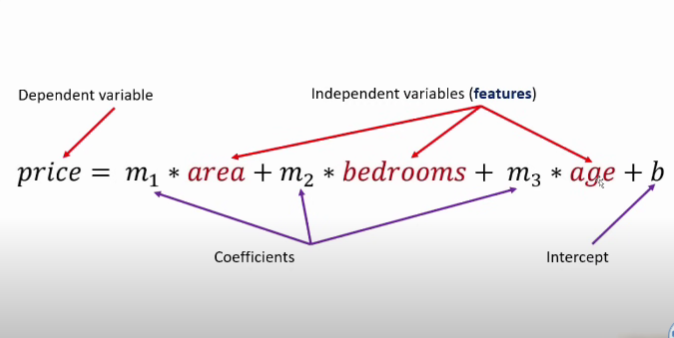

In [6]:
coef = reg.coef_
for i in range(len(coef)):
    print(f'm{i+1} : {reg.coef_[i]:.2f}')

m1 : 112.06
m2 : 23388.88
m3 : -3231.72


In [7]:
reg.intercept_

221323.0018654043

In [8]:
prdct = [3000, 3, 40]
reg.predict([prdct])

c:\Users\Kawsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [9]:
res = 0
for i in range(len(prdct)):
    res += reg.coef_[i] * prdct[i]
res += reg.intercept_
res

498408.2515803068

In [10]:
prdct = [2500, 4, 5]
reg.predict([prdct])

c:\Users\Kawsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [11]:
res = 0
for i in range(len(prdct)):
    res += reg.coef_[i] * prdct[i]
res += reg.intercept_
res

578876.0374893326